Name:Abdul Wasae

Student ID:478655

# Understanding the Dataset

Let's take a look at what we have.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import random
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('/Users/abdulwasae/Downloads/CSE514'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        print(filename)

data_set = pd.read_csv("/Users/abdulwasae/Downloads/CSE514/letter-recognition.data")

/Users/abdulwasae/Downloads/CSE514/letter-recognition.data
letter-recognition.data
/Users/abdulwasae/Downloads/CSE514/Concrete_Data.xls
Concrete_Data.xls


In [3]:
len(data_set)

19999

In [4]:
data_set

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# A) Data preprocessing 

We'll simplify to three binary classification problems.  
  Pair 1: H and K  
  Pair 2: M and Y  
  Pair 3: Your choice 

In [5]:
data_set_HK = data_set[(data_set['T'] == 'H') | (data_set['T'] == 'K')]

In [6]:
data_set_MY = data_set[(data_set['T'] == 'M') | (data_set['T'] == 'Y')]

In [7]:
data_set_AB = data_set[(data_set['T'] == 'A') | (data_set['T'] == 'B')]

In [8]:
HK_train, HK_test = train_test_split(
 data_set_HK, test_size=0.10, random_state=42)

MY_train, MY_test = train_test_split(
 data_set_MY, test_size=0.10, random_state=42)

AB_train, AB_test = train_test_split(
 data_set_AB, test_size=0.10, random_state=42)

X_HK = HK_train.drop(columns=['T'])
Y_HK = HK_train['T']
X_MY = MY_train.drop(columns=['T'])
Y_MY = MY_train['T']
X_AB = AB_train.drop(columns=['T'])
Y_AB = AB_train['T']

In [9]:
HK_train.shape,MY_train.shape,AB_train.shape, X_HK.shape

((1325, 17), (1420, 17), (1399, 17), (1325, 16))

In [10]:
HK_test.shape,MY_test.shape,AB_test.shape, Y_HK.shape

((148, 17), (158, 17), (156, 17), (1325,))

# Model Training

KNN Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
p = [1, 2, 3, 4, 5, 6, 7]
n_neighbors = [1, 3, 5, 7, 9]
tune_hyper = dict(p = p, n_neighbors = n_neighbors)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, tune_hyper, cv=5)
clf_1 = GridSearchCV(knn, tune_hyper, cv=5)
clf_2 = GridSearchCV(knn, tune_hyper, cv=5)

In [69]:
model_fit_HK = clf.fit(X_HK, Y_HK)
model_fit_MY = clf_1.fit(X_MY, Y_MY)
model_fit_AB = clf_2.fit(X_AB, Y_AB)

In [13]:
from prettytable import PrettyTable

KNN_Model_results = PrettyTable(["Model", "best_score", "p", "n_neighbour"])
KNN_Model_results.add_row(["Model_HK", model_fit_HK.best_score_,model_fit_HK.best_params_['p'], model_fit_HK.best_params_['n_neighbors']])
KNN_Model_results.add_row(["Model_MY", model_fit_MY.best_score_,model_fit_MY.best_params_['p'], model_fit_MY.best_params_['n_neighbors']])
KNN_Model_results.add_row(["Model_AB", model_fit_AB.best_score_,model_fit_AB.best_params_['p'], model_fit_AB.best_params_['n_neighbors']])
KNN_Model_results

Model,best_score,p,n_neighbour
Model_HK,0.9554716981132074,1,3
Model_MY,0.9992957746478872,1,1
Model_AB,1.0,2,3


In [14]:
## grid search function taken from stack overflow
def plot_search_results(grid):

    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1,linestyle='--', marker='o')
        ax[i].set_xlabel(p.upper())
    
    plt.show()

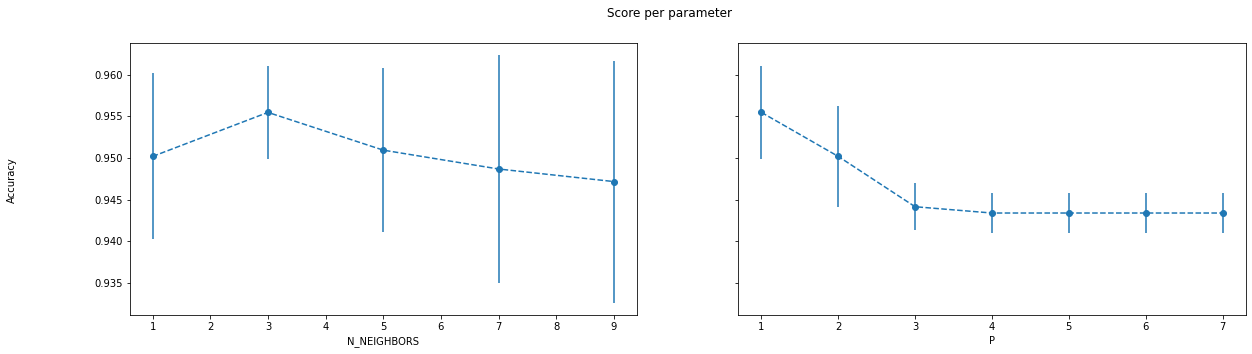

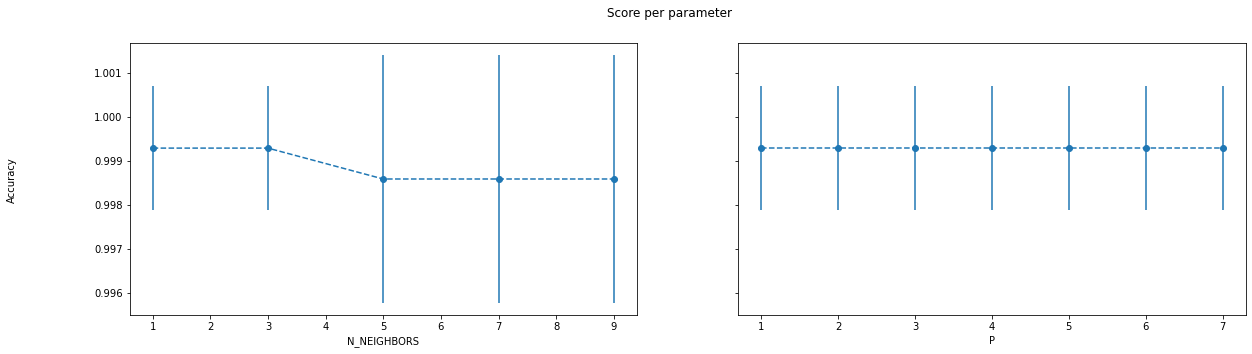

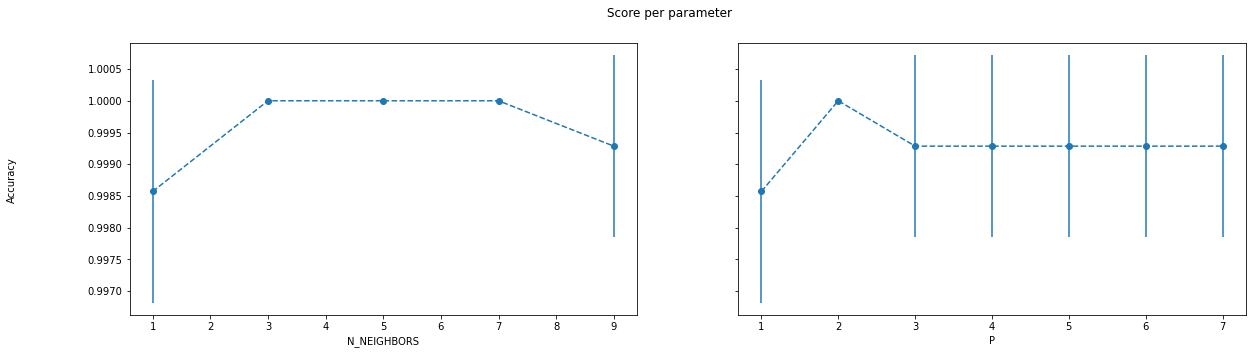

In [15]:
plot_search_results(model_fit_HK)
plot_search_results(model_fit_MY)
plot_search_results(model_fit_AB)

Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [20,40,60,80,100]
max_depth = [4,6,8,10,12]
tune_hyper_rand_forest = dict(n_estimators=n_estimators,max_depth=max_depth)
model_random_forest = RandomForestClassifier()
clf_rf_0 = GridSearchCV(model_random_forest, tune_hyper_rand_forest, cv=5)
clf_rf_1 = GridSearchCV(model_random_forest, tune_hyper_rand_forest, cv=5)
clf_rf_2 = GridSearchCV(model_random_forest, tune_hyper_rand_forest, cv=5)

In [66]:
model_fit__rf_HK = clf_rf_0.fit(X_HK, Y_HK)
model_fit__rf_MY = clf_rf_1.fit(X_MY, Y_MY)
model_fit__rf_AB = clf_rf_2.fit(X_AB, Y_AB)

In [18]:
RForest_Model_results = PrettyTable(["Model", "best_score", "max_depth", "n_estimators"])
RForest_Model_results.add_row(["Model_HK", model_fit__rf_HK.best_score_,model_fit__rf_HK.best_params_['max_depth'], model_fit__rf_HK.best_params_['n_estimators']])
RForest_Model_results.add_row(["Model_MY", model_fit__rf_MY.best_score_,model_fit__rf_MY.best_params_['max_depth'], model_fit__rf_MY.best_params_['n_estimators']])
RForest_Model_results.add_row(["Model_AB", model_fit__rf_AB.best_score_,model_fit__rf_AB.best_params_['max_depth'], model_fit__rf_AB.best_params_['n_estimators']])
RForest_Model_results

Model,best_score,max_depth,n_estimators
Model_HK,0.9675471698113208,10,80
Model_MY,0.9985915492957746,6,20
Model_AB,0.9992857142857143,10,40


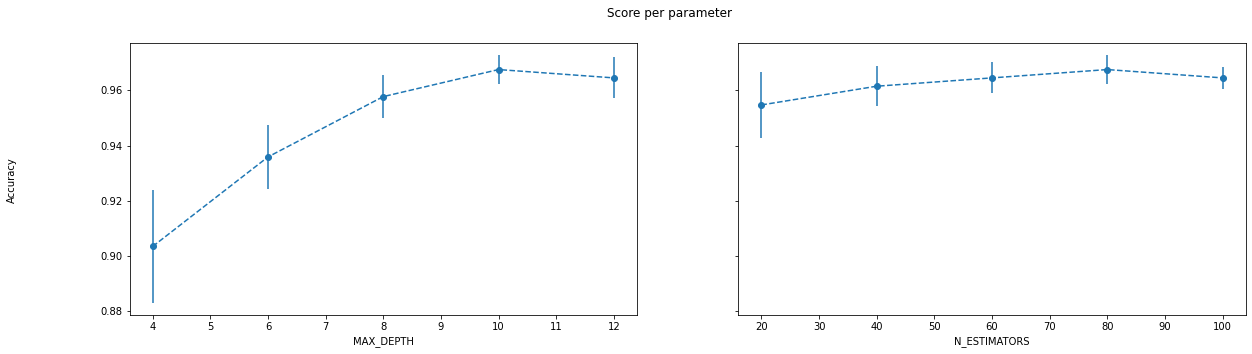

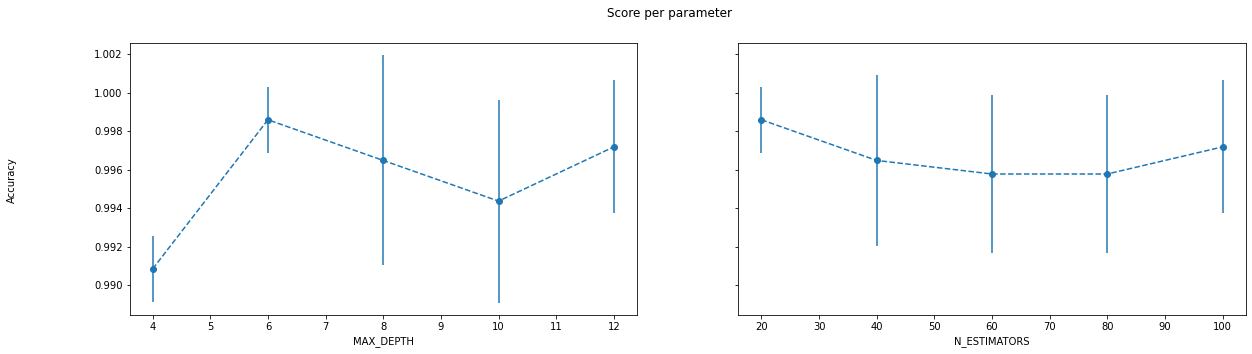

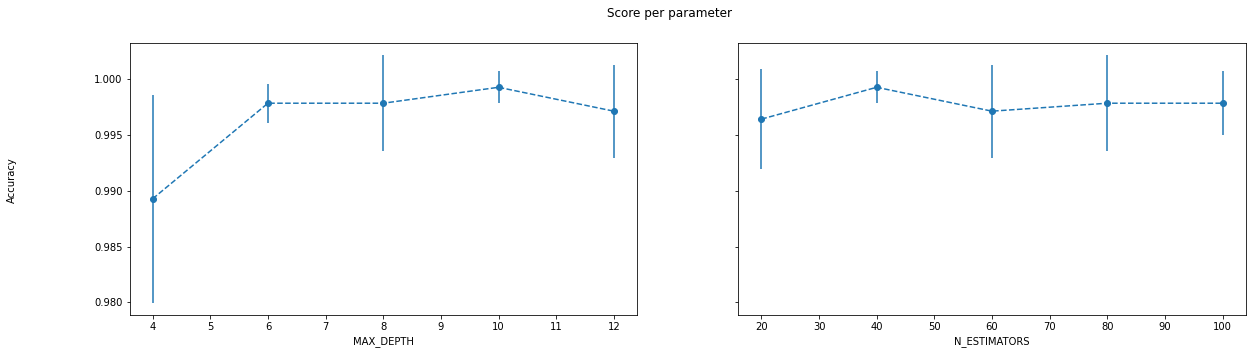

In [19]:
plot_search_results(model_fit__rf_HK)
plot_search_results(model_fit__rf_MY)
plot_search_results(model_fit__rf_AB)

Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

max_depth = [2,4,6,8,10]
max_features = ['auto', 'sqrt', 'log2']
tune_hyper_decision_tree = dict(max_depth=max_depth, max_features=max_features)
decision_tree_model = DecisionTreeClassifier()


In [21]:
clf_dt_0 = GridSearchCV(decision_tree_model, tune_hyper_decision_tree, cv=5)
clf_dt_1 = GridSearchCV(decision_tree_model, tune_hyper_decision_tree, cv=5)
clf_dt_2 = GridSearchCV(decision_tree_model, tune_hyper_decision_tree, cv=5)

In [67]:
model_fit__dt_HK = clf_dt_0.fit(X_HK, Y_HK)
model_fit__dt_MY = clf_dt_1.fit(X_MY, Y_MY)
model_fit__dt_AB = clf_dt_2.fit(X_AB, Y_AB)

In [23]:
Decision_Tree_Model_results = PrettyTable(["Model", "best_score", "max_depth", "max_features"])
Decision_Tree_Model_results.add_row(["Model_HK", model_fit__dt_HK.best_score_,model_fit__dt_HK.best_params_['max_depth'], model_fit__dt_HK.best_params_['max_features']])
Decision_Tree_Model_results.add_row(["Model_MY", model_fit__dt_MY.best_score_,model_fit__dt_MY.best_params_['max_depth'], model_fit__dt_MY.best_params_['max_features']])
Decision_Tree_Model_results.add_row(["Model_AB", model_fit__dt_AB.best_score_,model_fit__dt_AB.best_params_['max_depth'], model_fit__dt_AB.best_params_['max_features']])
Decision_Tree_Model_results

Model,best_score,max_depth,max_features
Model_HK,0.9147169811320754,10,sqrt
Model_MY,0.98943661971831,8,auto
Model_AB,0.9857091653865847,8,sqrt


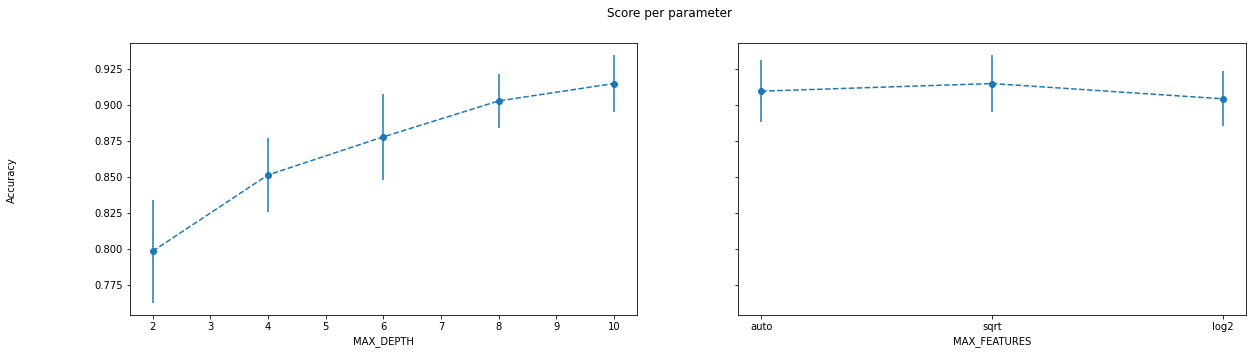

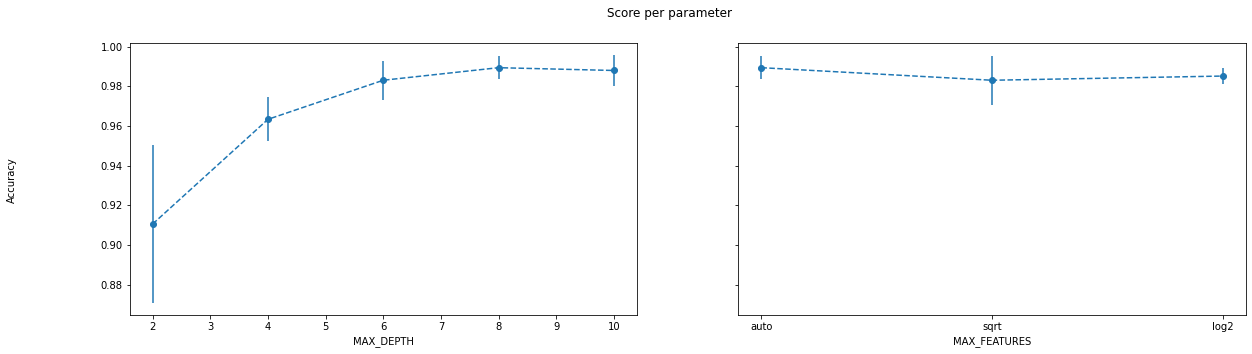

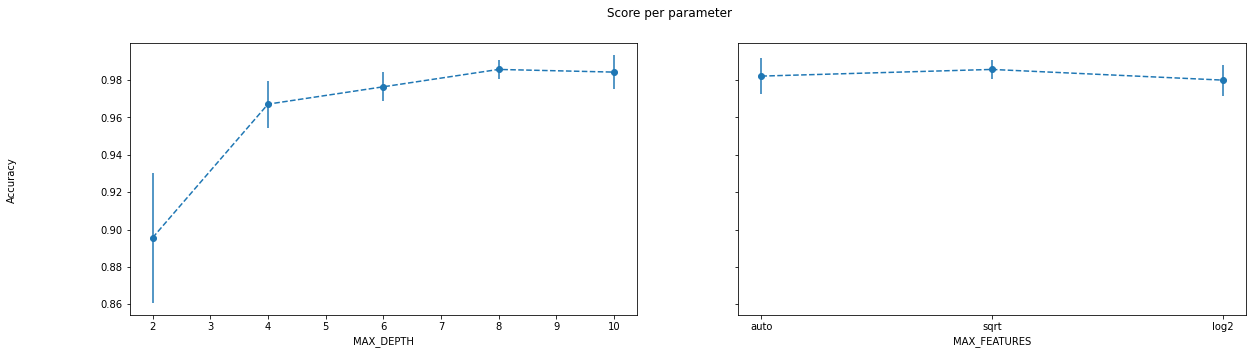

In [24]:
plot_search_results(model_fit__dt_HK)
plot_search_results(model_fit__dt_MY)
plot_search_results(model_fit__dt_AB)

Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
solver= ['newton-cg','saga', 'liblinear']
C = [0.00001, 0.0001, 0.001, 0.01, 0.1]
tune_logistic_regression = dict(solver=solver, C=C)
model_logistic_regression = LogisticRegression(max_iter=1200000)

In [26]:
grid_search_logistic_0 = GridSearchCV(model_logistic_regression, tune_logistic_regression, cv=5)
grid_search_logistic_1 = GridSearchCV(model_logistic_regression, tune_logistic_regression, cv=5)
grid_search_logistic_2 = GridSearchCV(model_logistic_regression, tune_logistic_regression, cv=5)

In [27]:
model_fit__lr_HK = grid_search_logistic_0.fit(X_HK, Y_HK)
model_fit__lr_MY = grid_search_logistic_1.fit(X_MY, Y_MY)
model_fit__lr_AB = grid_search_logistic_2.fit(X_AB, Y_AB)

In [28]:
Logistic_Regression_Model_results = PrettyTable(["Model", "best_score", "C", "solver"])
Logistic_Regression_Model_results.add_row(["Model_HK", model_fit__lr_HK.best_score_,model_fit__lr_HK.best_params_['C'], model_fit__lr_HK.best_params_['solver']])
Logistic_Regression_Model_results.add_row(["Model_MY", model_fit__lr_MY.best_score_,model_fit__lr_MY.best_params_['C'], model_fit__lr_MY.best_params_['solver']])
Logistic_Regression_Model_results.add_row(["Model_AB", model_fit__lr_AB.best_score_,model_fit__lr_AB.best_params_['C'], model_fit__lr_AB.best_params_['solver']])
Logistic_Regression_Model_results

Model,best_score,C,solver
Model_HK,0.9245283018867922,0.1,newton-cg
Model_MY,0.9971830985915492,0.1,newton-cg
Model_AB,0.9921428571428571,0.1,saga


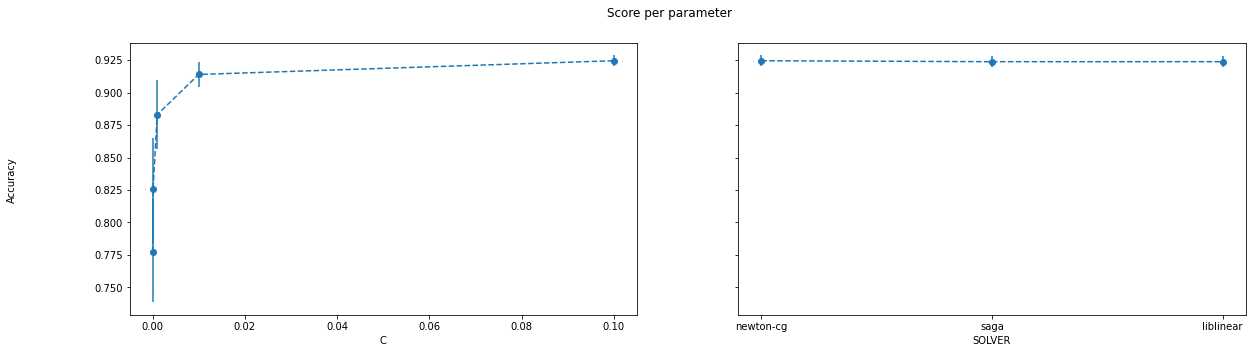

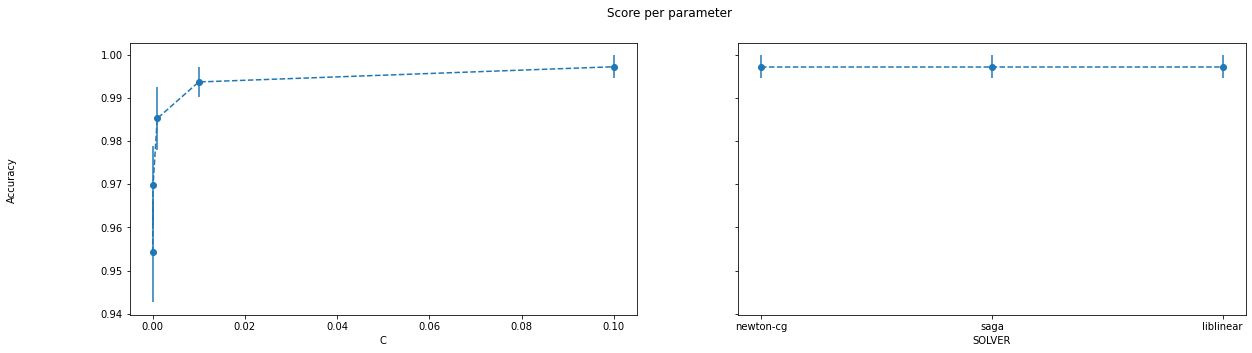

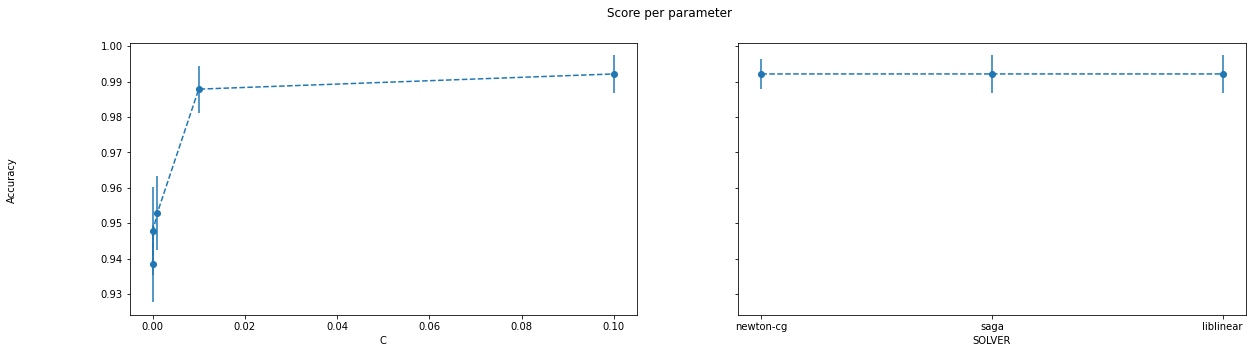

In [29]:
plot_search_results(model_fit__lr_HK)
plot_search_results(model_fit__lr_MY)
plot_search_results(model_fit__lr_AB)

SVM

In [30]:
from sklearn.svm import SVC

tune_hyper_SVM = dict(kernel=['rbf'] , gamma=[1, 0.1, 0.01, 0.001, 0.0001],C=[0.1, 1, 10, 100, 1000])
model_SVM = SVC()

In [31]:
grid_search_SVM_0 = GridSearchCV(model_SVM, tune_hyper_SVM, cv=5)
grid_search_SVM_1 = GridSearchCV(model_SVM, tune_hyper_SVM, cv=5)
grid_search_SVM_2 = GridSearchCV(model_SVM, tune_hyper_SVM, cv=5)

In [68]:
model_fit__SVM_HK = grid_search_SVM_0.fit(X_HK, Y_HK)
model_fit__SVM_MY = grid_search_SVM_1.fit(X_MY, Y_MY)
model_fit__SVM_AB = grid_search_SVM_2.fit(X_AB, Y_AB)

In [33]:
SVM_Model_results = PrettyTable(["Model", "best_score", "C", "gamma", "kernel"])
SVM_Model_results.add_row(["Model_HK", model_fit__SVM_HK.best_score_,model_fit__SVM_HK.best_params_['C'], model_fit__SVM_HK.best_params_['gamma'], model_fit__SVM_HK.best_params_['kernel'] ])
SVM_Model_results.add_row(["Model_MY", model_fit__SVM_MY.best_score_,model_fit__SVM_MY.best_params_['C'], model_fit__SVM_MY.best_params_['gamma'], model_fit__SVM_MY.best_params_['kernel']])
SVM_Model_results.add_row(["Model_AB", model_fit__SVM_AB.best_score_,model_fit__SVM_AB.best_params_['C'], model_fit__SVM_AB.best_params_['gamma'], model_fit__SVM_AB.best_params_['kernel']])
SVM_Model_results

Model,best_score,C,gamma,kernel
Model_HK,0.9766037735849057,100,0.01,rbf
Model_MY,0.9985915492957746,1,0.1,rbf
Model_AB,1.0,1,0.1,rbf


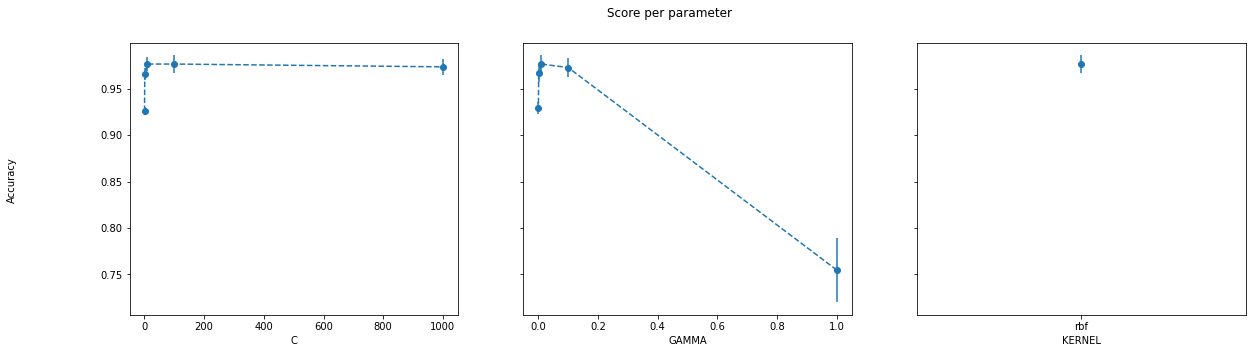

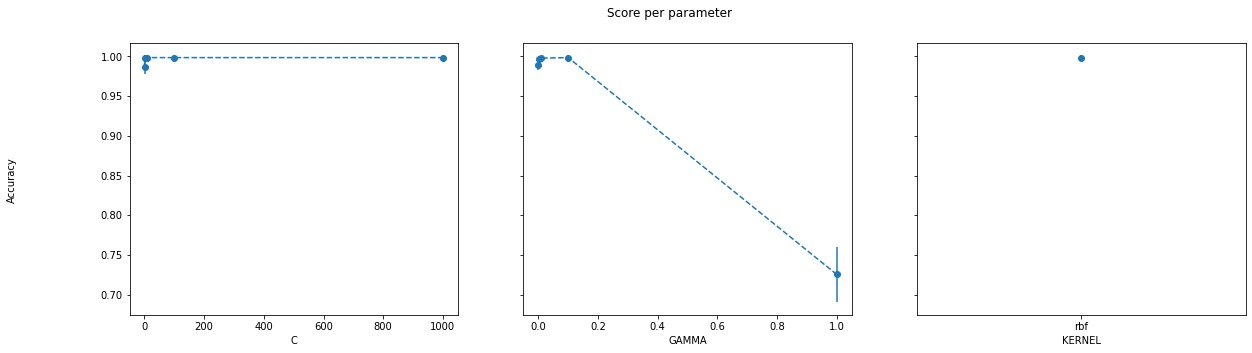

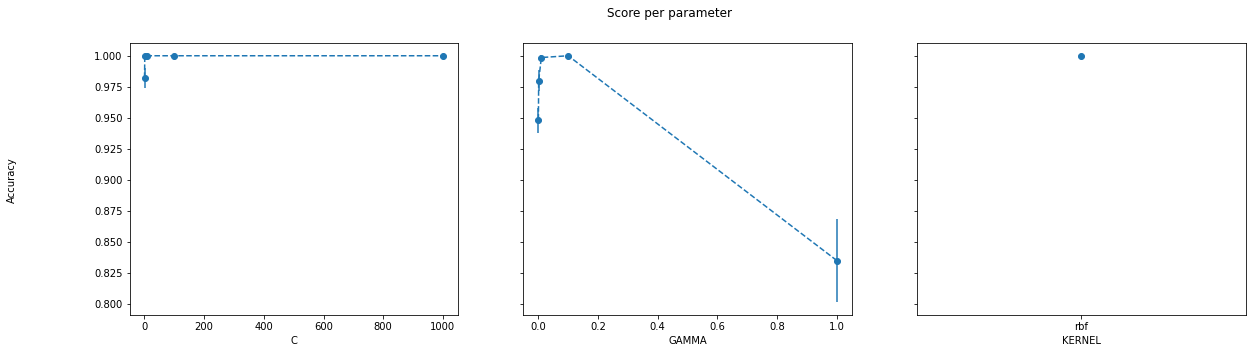

In [34]:
plot_search_results(model_fit__SVM_HK)
plot_search_results(model_fit__SVM_MY)
plot_search_results(model_fit__SVM_AB)

Artificial Neural Networks

In [35]:
from sklearn.neural_network import MLPClassifier

ANN_tune = dict(activation=['identity', 'logistic', 'tanh', 'relu'],learning_rate_init=[0.1, 0.01, 0.001, 0.002, 0.0001])
model_ANN = MLPClassifier(max_iter=1000)
grid_search_ANN_0 = GridSearchCV(model_ANN, ANN_tune, cv=5)
grid_search_ANN_1 = GridSearchCV(model_ANN, ANN_tune, cv=5)
grid_search_ANN_2 = GridSearchCV(model_ANN, ANN_tune, cv=5)

In [36]:
model_fit__ANN_HK = grid_search_ANN_0.fit(X_HK, Y_HK)
model_fit__ANN_MY = grid_search_ANN_1.fit(X_MY, Y_MY)
model_fit__ANN_AB = grid_search_ANN_2.fit(X_AB, Y_AB)

/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarni

In [37]:
ANN_Model_results = PrettyTable(["Model", "score","activation", "learning_rate_init"])
ANN_Model_results.add_row(["Model_HK", model_fit__ANN_HK.best_score_,model_fit__ANN_HK.best_params_['activation'], model_fit__ANN_HK.best_params_['learning_rate_init']])
ANN_Model_results.add_row(["Model_MY", model_fit__ANN_MY.best_score_,model_fit__ANN_MY.best_params_['activation'], model_fit__ANN_MY.best_params_['learning_rate_init']])
ANN_Model_results.add_row(["Model_AB", model_fit__ANN_AB.best_score_,model_fit__ANN_AB.best_params_['activation'], model_fit__ANN_AB.best_params_['learning_rate_init']])
ANN_Model_results

Model,score,activation,learning_rate_init
Model_HK,0.9781132075471698,tanh,0.001
Model_MY,0.997887323943662,identity,0.1
Model_AB,0.9957142857142858,logistic,0.01


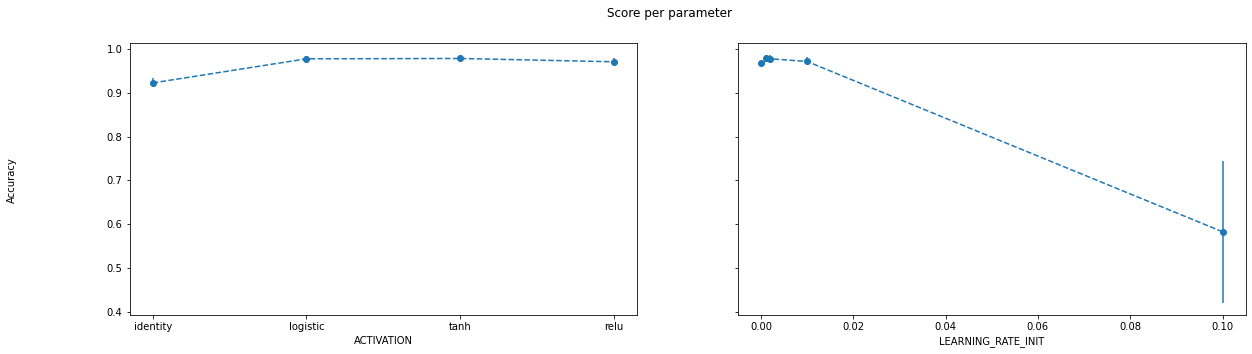

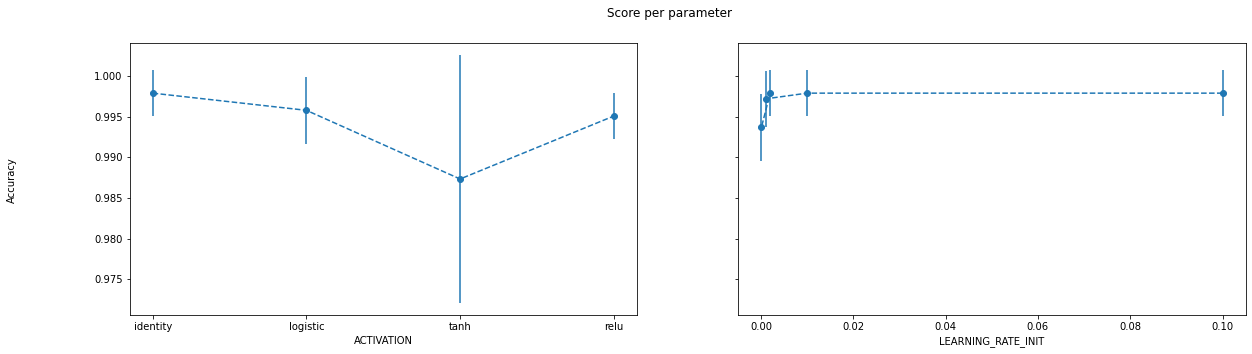

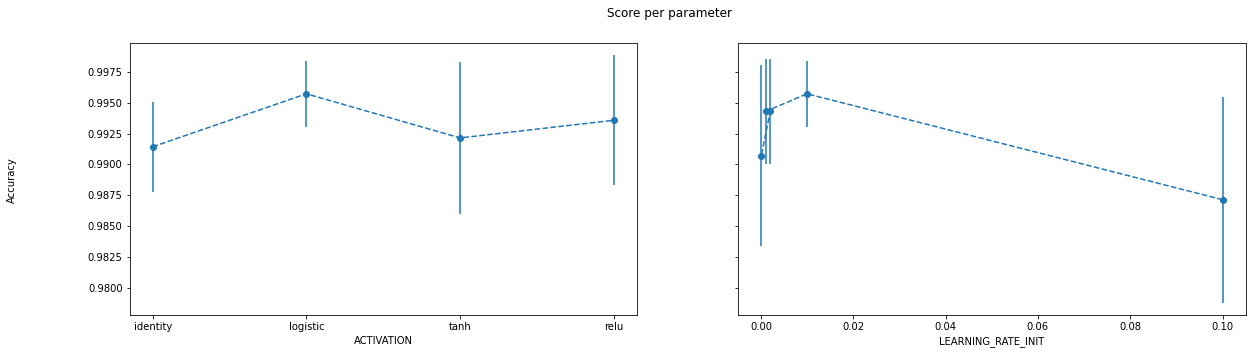

In [38]:
plot_search_results(model_fit__ANN_HK)
plot_search_results(model_fit__ANN_MY)
plot_search_results(model_fit__ANN_AB)

Naive Bayes: Additional

In [39]:
from sklearn.naive_bayes import GaussianNB

NB_tuning = dict(var_smoothing=np.logspace(0,-9, num=100))
NB = GaussianNB()
grid_search_NB_0 = GridSearchCV(NB, NB_tuning, cv=5)
grid_search_NB_1 = GridSearchCV(NB, NB_tuning, cv=5)
grid_search_NB_2 = GridSearchCV(NB, NB_tuning, cv=5)
model_fit__NB_HK = grid_search_NB_0.fit(X_HK, Y_HK)
model_fit__NB_MY = grid_search_NB_1.fit(X_MY, Y_MY)
model_fit__NB_AB = grid_search_NB_2.fit(X_AB, Y_AB)

In [40]:
NB_Model_results = PrettyTable(["Model", "score","var_smoothing"])
NB_Model_results.add_row(["Model_HK", model_fit__NB_HK.best_score_,model_fit__NB_HK.best_params_['var_smoothing']])
NB_Model_results.add_row(["Model_MY", model_fit__NB_MY.best_score_,model_fit__NB_MY.best_params_['var_smoothing']])
NB_Model_results.add_row(["Model_AB", model_fit__NB_AB.best_score_,model_fit__NB_AB.best_params_['var_smoothing']])
NB_Model_results

Model,score,var_smoothing
Model_HK,0.8520754716981133,0.15199110829529336
Model_MY,0.9704225352112676,0.02310129700083159
Model_AB,0.9513927291346645,0.0015199110829529332


# Dimension Reduction

We will reduce the dimension by selecting the observation with highest variance

In [41]:
X_HK_reduced = X_HK.var().sort_values()[-4:]
X_MY_reduced = X_MY.var().sort_values()[-4:]
X_MY_reduced = X_AB.var().sort_values()[-4:]
X_HK_reduced, X_MY_reduced, X_MY_reduced

(3     4.955623
 6     5.003873
 8    11.154954
 0    14.460626
 dtype: float64,
 5       4.827504
 13      5.069705
 0.2     6.141412
 8      11.426854
 dtype: float64,
 5       4.827504
 13      5.069705
 0.2     6.141412
 8      11.426854
 dtype: float64)

In [42]:
X_HK_reduced = X_HK[['3','6','8','0']]
X_HK_reduced.shape

(1325, 4)

In [43]:
X_MY_reduced = X_MY[['5','13','0.2','8']]
X_MY_reduced.shape

(1420, 4)

In [44]:
X_AB_reduced = X_AB[['5','13','0.2','8']]
X_AB_reduced.shape

(1399, 4)

# KNN with dimension reduction

In [45]:
print(p)
print(n_neighbors)

[1, 2, 3, 4, 5, 6, 7]
[1, 3, 5, 7, 9]


In [46]:
model_KNN_reduced_HK = clf.fit(X_HK_reduced, Y_HK)
model_KNN_reduced_MY = clf_1.fit(X_MY_reduced, Y_MY)
model_KNN_reduced_AB = clf_2.fit(X_AB_reduced, Y_AB)

In [47]:
KNN_Reduced_Model_results = PrettyTable(["Reduced KNN Model", "best_score", "p", "n_neighbour"])
KNN_Reduced_Model_results.add_row(["Reduced Model_HK", model_KNN_reduced_HK.best_score_,model_KNN_reduced_HK.best_params_['p'], model_KNN_reduced_HK.best_params_['n_neighbors']])
KNN_Reduced_Model_results.add_row(["Reduced Model_MY", model_KNN_reduced_MY.best_score_,model_KNN_reduced_MY.best_params_['p'], model_KNN_reduced_MY.best_params_['n_neighbors']])
KNN_Reduced_Model_results.add_row(["Reduced Model_AB", model_KNN_reduced_AB.best_score_,model_KNN_reduced_AB.best_params_['p'], model_KNN_reduced_AB.best_params_['n_neighbors']])
KNN_Reduced_Model_results

Reduced KNN Model,best_score,p,n_neighbour
Reduced Model_HK,0.9018867924528303,2,3
Reduced Model_MY,0.980281690140845,2,1
Reduced Model_AB,0.9628341013824885,2,5


# Decision Tree with dimension reduction

In [48]:
model_fit_reduced_dt_HK = clf_dt_0.fit(X_HK_reduced, Y_HK)
model_fit_reduced_dt_MY = clf_dt_1.fit(X_MY_reduced, Y_MY)
model_fit_reduced_dt_AB = clf_dt_2.fit(X_AB_reduced, Y_AB)

In [49]:
Decision_Tree_Reduced_Model_results = PrettyTable(["Model", "best_score", "max_depth", "max_features"])
Decision_Tree_Reduced_Model_results.add_row(["Model_HK", model_fit_reduced_dt_HK.best_score_,model_fit_reduced_dt_HK.best_params_['max_depth'], model_fit_reduced_dt_HK.best_params_['max_features']])
Decision_Tree_Reduced_Model_results.add_row(["Model_MY", model_fit_reduced_dt_MY.best_score_,model_fit_reduced_dt_MY.best_params_['max_depth'], model_fit_reduced_dt_MY.best_params_['max_features']])
Decision_Tree_Reduced_Model_results.add_row(["Model_AB", model_fit_reduced_dt_AB.best_score_,model_fit_reduced_dt_AB.best_params_['max_depth'], model_fit_reduced_dt_AB.best_params_['max_features']])
Decision_Tree_Reduced_Model_results

Model,best_score,max_depth,max_features
Model_HK,0.889056603773585,10,log2
Model_MY,0.9591549295774648,10,auto
Model_AB,0.9606810035842294,8,log2


# SMV with dimension reduction

In [50]:
model_fit_reduced_SVM_HK = grid_search_SVM_0.fit(X_HK_reduced, Y_HK)
model_fit_reduced_SVM_MY = grid_search_SVM_1.fit(X_MY_reduced, Y_MY)
model_fit_reduced_SVM_AB = grid_search_SVM_2.fit(X_AB_reduced, Y_AB)

In [51]:
SVM_Reduced_Model_results = PrettyTable(["Model", "best_score", "C", "gamma", "kernel"])
SVM_Reduced_Model_results.add_row(["Model_HK", model_fit_reduced_SVM_HK.best_score_,model_fit_reduced_SVM_HK.best_params_['C'], model_fit_reduced_SVM_HK.best_params_['gamma'], model_fit_reduced_SVM_HK.best_params_['kernel'] ])
SVM_Reduced_Model_results.add_row(["Model_MY", model_fit_reduced_SVM_MY.best_score_,model_fit_reduced_SVM_MY.best_params_['C'], model_fit_reduced_SVM_MY.best_params_['gamma'], model_fit_reduced_SVM_MY.best_params_['kernel']])
SVM_Reduced_Model_results.add_row(["Model_AB", model_fit_reduced_SVM_AB.best_score_,model_fit_reduced_SVM_AB.best_params_['C'], model_fit_reduced_SVM_AB.best_params_['gamma'], model_fit_reduced_SVM_AB.best_params_['kernel']])
SVM_Reduced_Model_results

Model,best_score,C,gamma,kernel
Model_HK,0.9109433962264152,1,1,rbf
Model_MY,0.9746478873239436,10,0.1,rbf
Model_AB,0.9685535074244752,10,0.1,rbf


# Results with dimension reduction

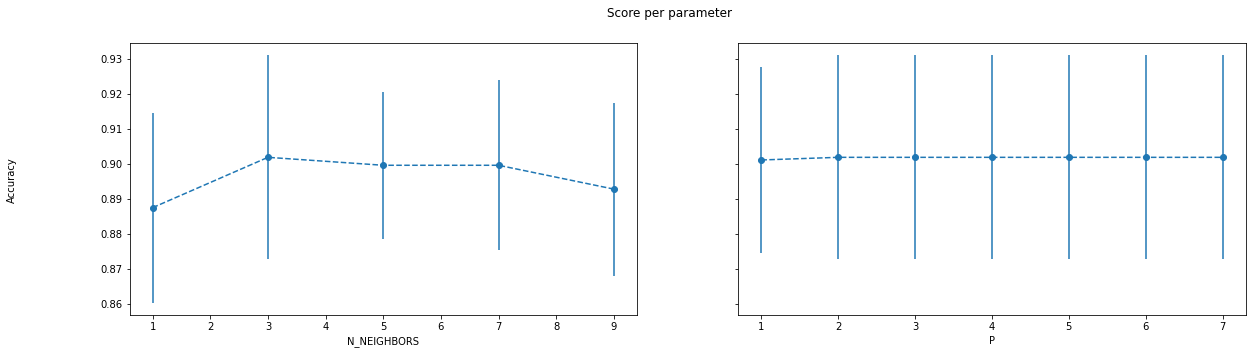

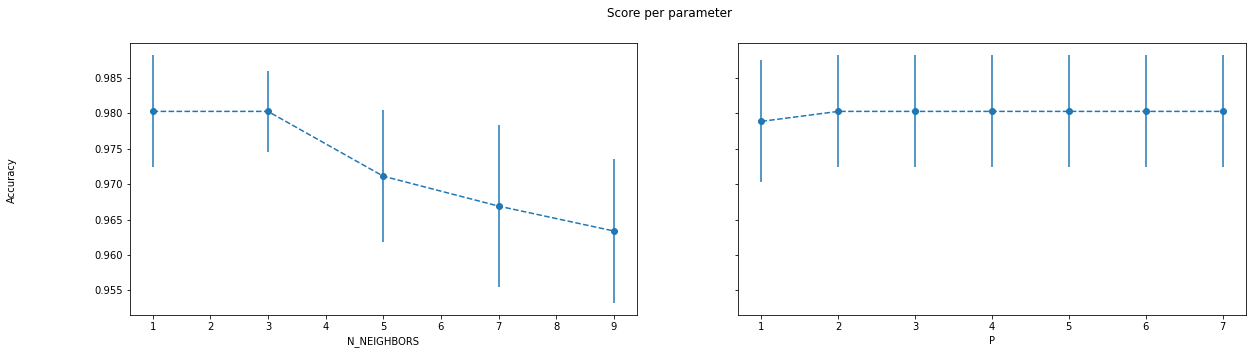

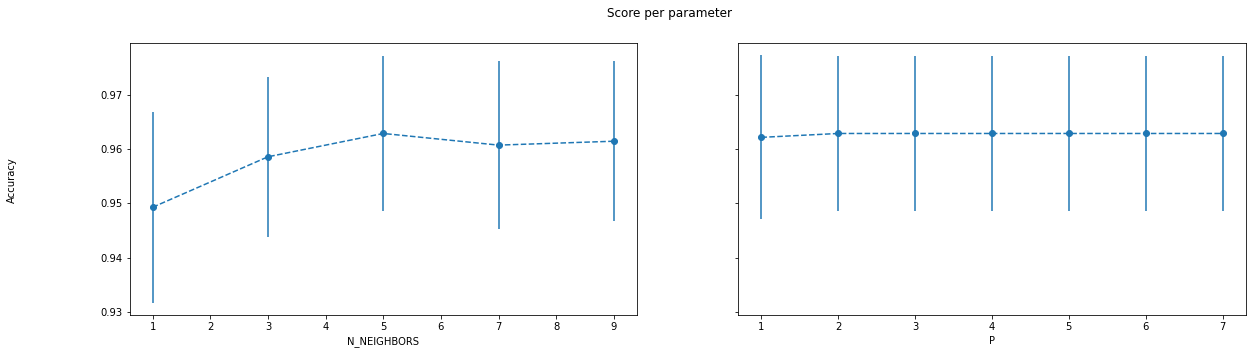

In [52]:
plot_search_results(model_KNN_reduced_HK)
plot_search_results(model_KNN_reduced_MY)
plot_search_results(model_KNN_reduced_AB)

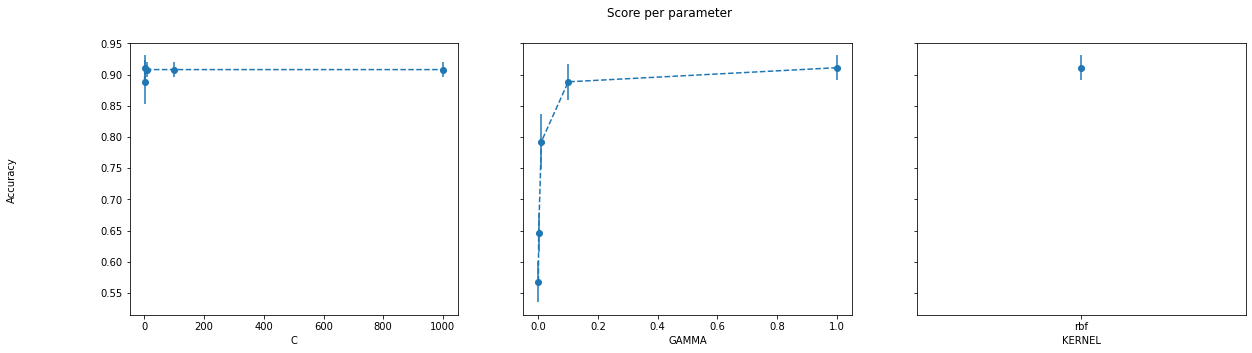

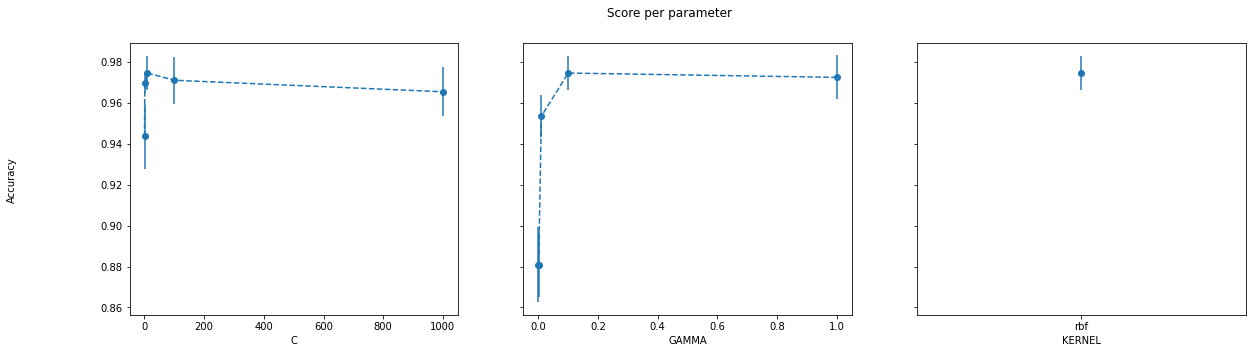

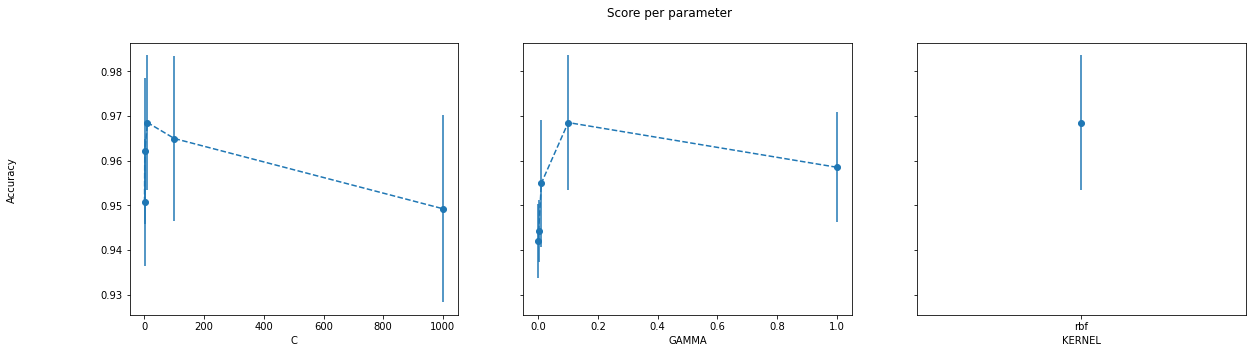

In [53]:
plot_search_results(model_fit_reduced_SVM_HK)
plot_search_results(model_fit_reduced_SVM_MY)
plot_search_results(model_fit_reduced_SVM_AB)

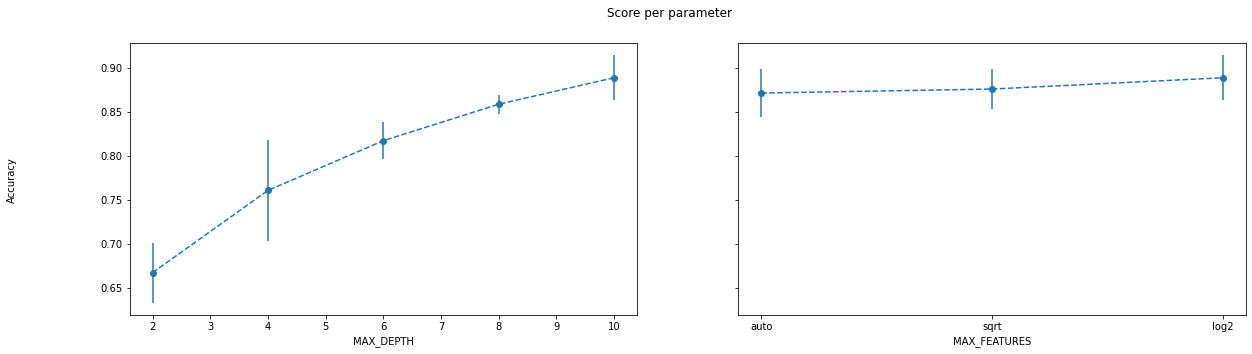

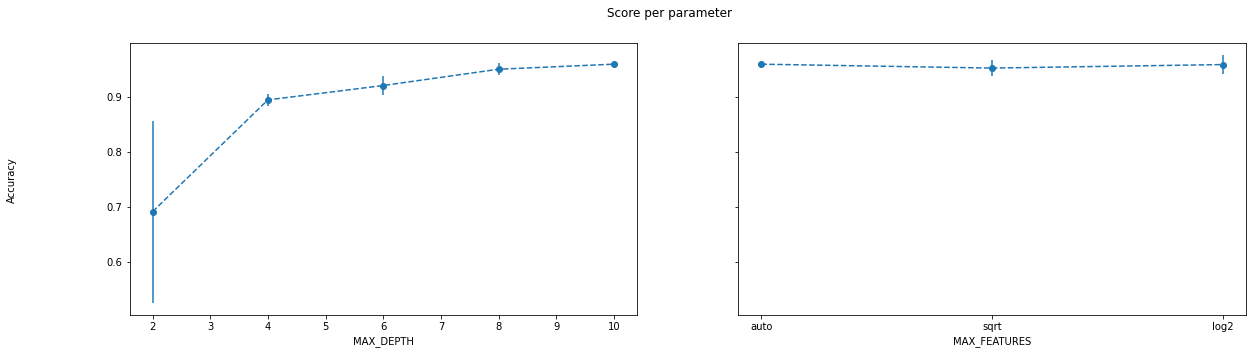

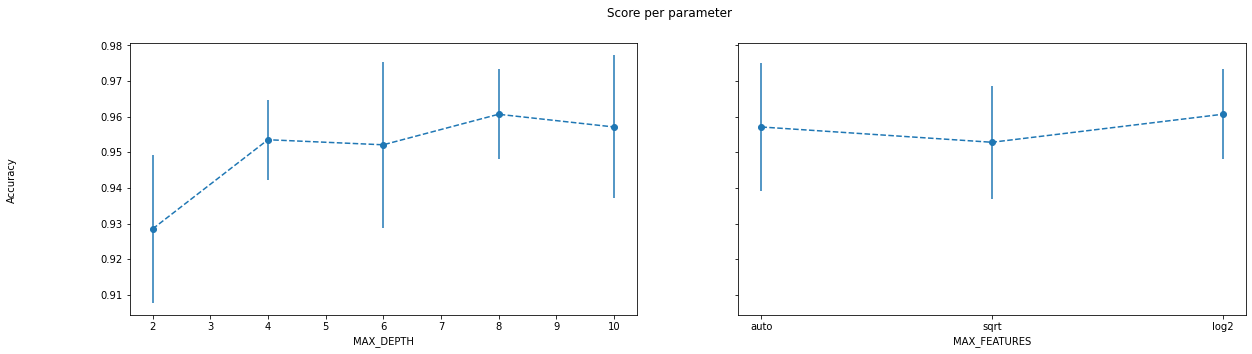

In [54]:
plot_search_results(model_fit_reduced_dt_HK)
plot_search_results(model_fit_reduced_dt_MY)
plot_search_results(model_fit_reduced_dt_AB)

# ANN with dimension reduction


In [55]:
components = PCA(n_components=4)
X_HK_reduced_t = components.fit_transform(X_HK)
X_MY_reduced_t = components.fit_transform(X_MY)
X_AB_reduced_t = components.fit_transform(X_AB)

In [56]:
X_HK_reduced_t.shape

(1325, 4)

In [57]:
model_fit_reduced_ANN_HK = grid_search_ANN_0.fit(X_HK_reduced_t, Y_HK)
model_fit_reduced_ANN_MY = grid_search_ANN_1.fit(X_MY_reduced_t, Y_MY)
model_fit_reduced_ANN_AB = grid_search_ANN_2.fit(X_AB_reduced_t, Y_AB)

/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarni

In [58]:
ANN_Reduced_Model_results = PrettyTable(["Model", "score","activation", "learning_rate_init"])
ANN_Reduced_Model_results.add_row(["Model_HK", model_fit_reduced_ANN_HK.best_score_,model_fit_reduced_ANN_HK.best_params_['activation'], model_fit_reduced_ANN_HK.best_params_['learning_rate_init']])
ANN_Reduced_Model_results.add_row(["Model_MY", model_fit_reduced_ANN_MY.best_score_,model_fit_reduced_ANN_MY.best_params_['activation'], model_fit_reduced_ANN_MY.best_params_['learning_rate_init']])
ANN_Reduced_Model_results.add_row(["Model_AB", model_fit_reduced_ANN_AB.best_score_,model_fit_reduced_ANN_AB.best_params_['activation'], model_fit_reduced_ANN_AB.best_params_['learning_rate_init']])
ANN_Reduced_Model_results

Model,score,activation,learning_rate_init
Model_HK,0.9041509433962265,relu,0.01
Model_MY,0.9830985915492958,logistic,0.001
Model_AB,0.9871351766513058,relu,0.01


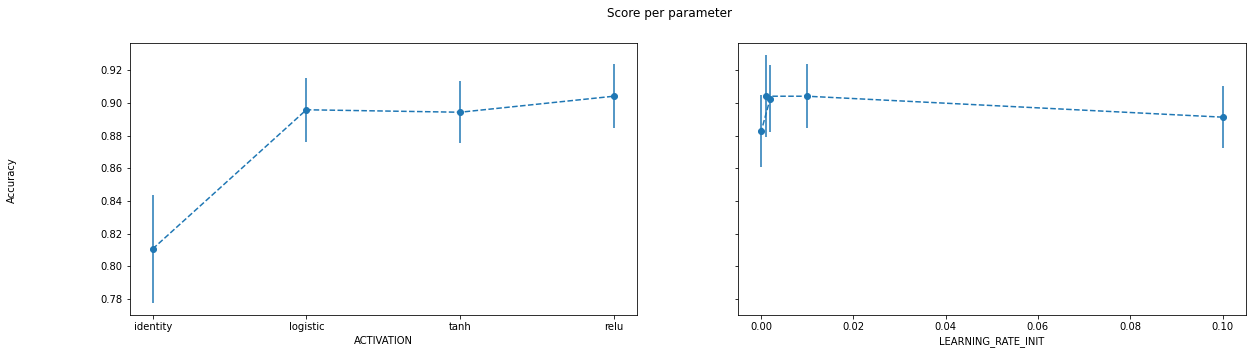

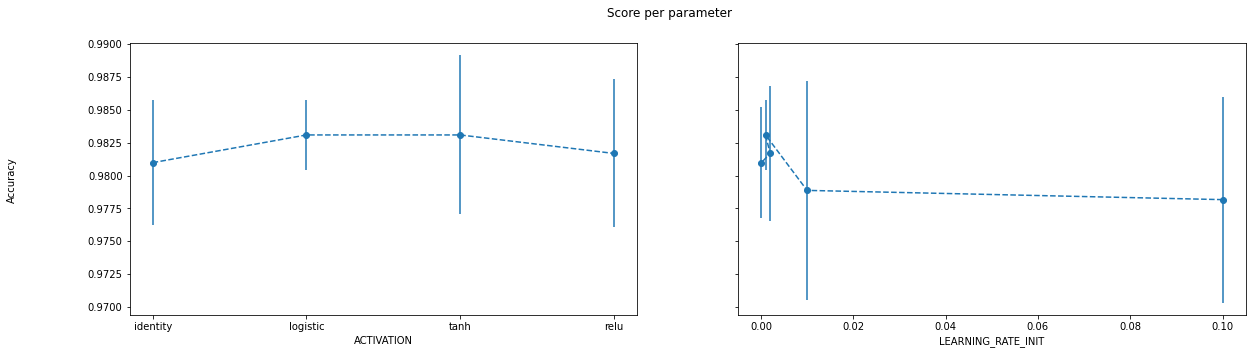

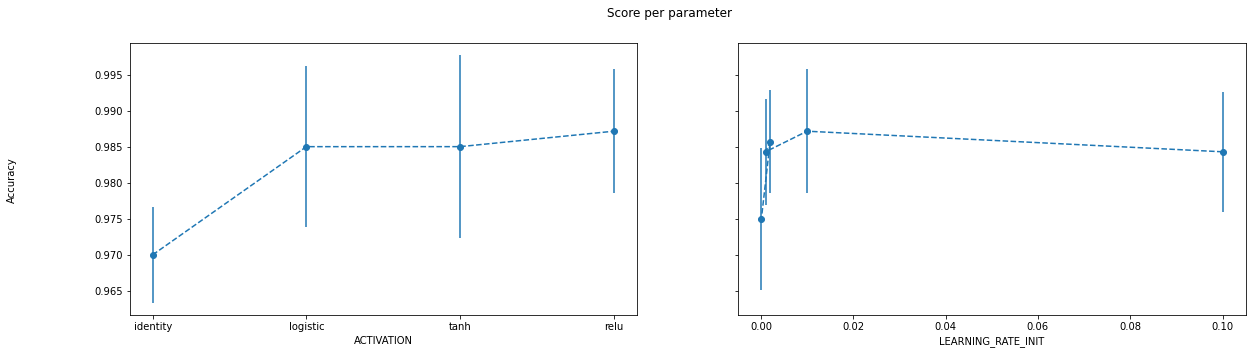

In [59]:
plot_search_results(model_fit_reduced_ANN_HK)
plot_search_results(model_fit_reduced_ANN_MY)
plot_search_results(model_fit_reduced_ANN_AB)

# Random Forest with dimension reduction



In [60]:
randForest = RandomForestClassifier().fit(X_HK, Y_HK)
result = permutation_importance(randForest, X_HK, Y_HK)
X_HK_rf_reduced = X_HK[['8.2','0','8.1','0.1']]
X_MY_rf_reduced = X_MY[['0.1','8.3','10','8.4']]
X_AB_rf_reduced = X_AB[['8.4','0.2','6','10']]

In [61]:
model_fit_reduced_rf_HK = clf_rf_0.fit(X_HK_rf_reduced, Y_HK)
model_fit_reduced_rf_MY = clf_rf_1.fit(X_MY_rf_reduced, Y_MY)
model_fit_reduced_rf_AB = clf_rf_2.fit(X_AB_rf_reduced, Y_AB)

In [62]:
RForest_Reduced_Model_results = PrettyTable(["Model", "best_score", "max_depth", "n_estimators"])
RForest_Reduced_Model_results.add_row(["Model_HK", model_fit_reduced_rf_HK.best_score_,model_fit_reduced_rf_HK.best_params_['max_depth'], model_fit_reduced_rf_HK.best_params_['n_estimators']])
RForest_Reduced_Model_results.add_row(["Model_MY", model_fit_reduced_rf_MY.best_score_,model_fit_reduced_rf_MY.best_params_['max_depth'], model_fit_reduced_rf_MY.best_params_['n_estimators']])
RForest_Reduced_Model_results.add_row(["Model_AB", model_fit_reduced_rf_AB.best_score_,model_fit_reduced_rf_AB.best_params_['max_depth'], model_fit_reduced_rf_AB.best_params_['n_estimators']])
RForest_Reduced_Model_results

Model,best_score,max_depth,n_estimators
Model_HK,0.9184905660377358,10,60
Model_MY,0.9936619718309858,6,100
Model_AB,0.9935688684075782,10,60


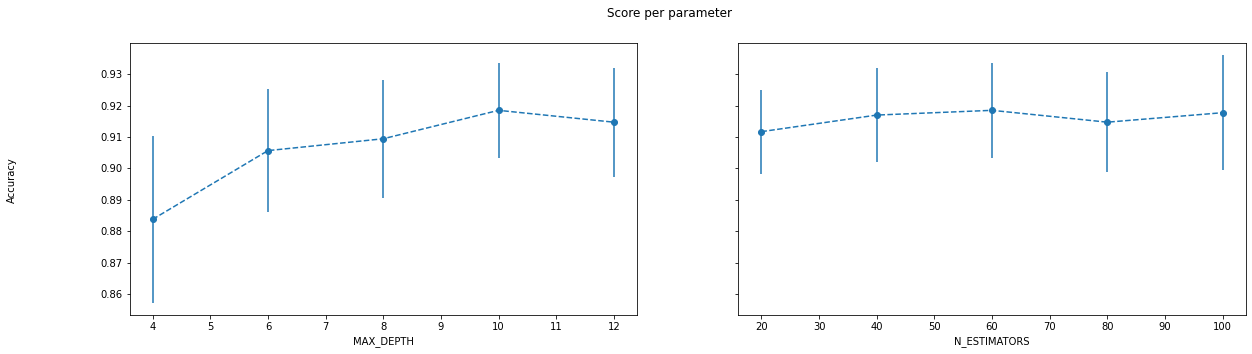

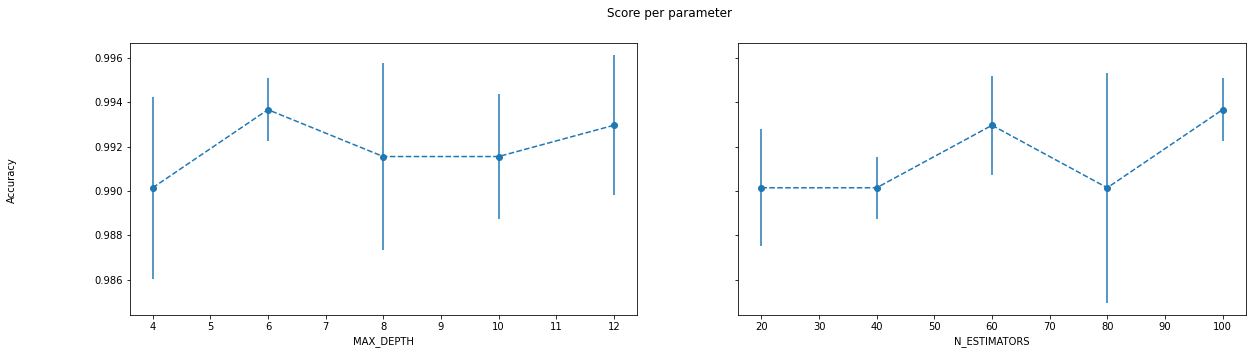

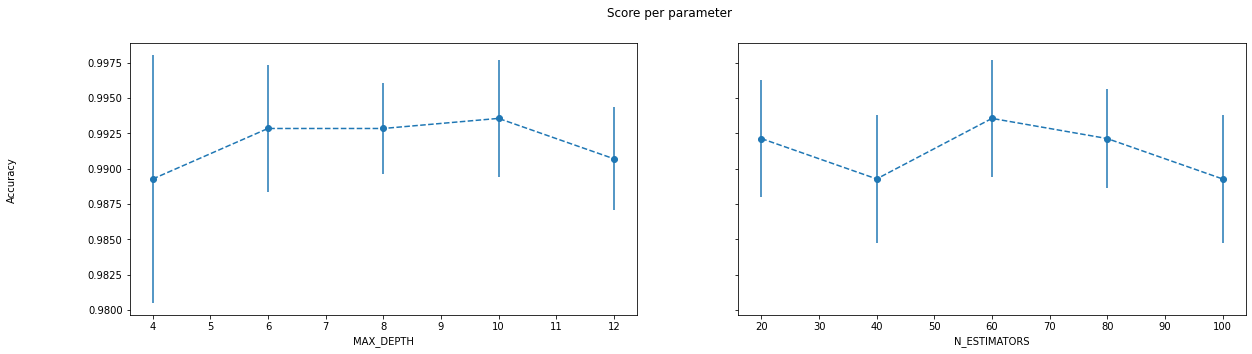

In [63]:
plot_search_results(model_fit_reduced_rf_HK)
plot_search_results(model_fit_reduced_rf_MY)
plot_search_results(model_fit_reduced_rf_AB)

# Testing

In [64]:
X_HK_test = HK_test.drop(columns=['T'])
Y_HK_test = HK_test['T']
X_MY_test = MY_test.drop(columns=['T'])
Y_MY_test = MY_test['T']
X_AB_test = AB_test.drop(columns=['T'])
Y_AB_test = AB_test['T']

# Without dimension reduction 

KNN

In [70]:
import time

T1 = time.time()
print("Accuracy 'HK': ", model_fit_HK.score(X_HK_test, Y_HK_test))
end1 = time.time()
print('Total time: ', end1-T1)
T2 = time.time()
print("Accuracy 'MY': ", model_fit_MY.score(X_MY_test, Y_MY_test))
T3 = time.time()
print('Total time: ', T3-T2)
T4 = time.time()
print("Accuracy 'AB': ", model_fit_AB.score(X_AB_test, Y_AB_test))
T5 = time.time()
print('Total time: ', T5-T4)

Accuracy 'HK':  0.9932432432432432
Total time:  0.00986790657043457
Accuracy 'MY':  1.0
Total time:  0.00898885726928711
Accuracy 'AB':  1.0
Total time:  0.009155035018920898


Decision Tree

In [71]:
T1 = time.time()
print("Accuracy 'HK': ", model_fit__dt_HK.score(X_HK_test, Y_HK_test))
end1 = time.time()
print('Total time: ', end1-T1)
T2 = time.time()
print("Accuracy 'MY': ", model_fit__dt_MY.score(X_MY_test, Y_MY_test))
T3 = time.time()
print('Total time: ', T3-T2)
T4 = time.time()
print("Accuracy 'AB': ", model_fit__dt_AB.score(X_AB_test, Y_AB_test))
T5 = time.time()
print('Total time: ', T5-T4)

Accuracy 'HK':  0.9527027027027027
Total time:  0.0034432411193847656
Accuracy 'MY':  0.9873417721518988
Total time:  0.0034589767456054688
Accuracy 'AB':  0.9871794871794872
Total time:  0.0024080276489257812


Random Forest

In [72]:
T1 = time.time()
print("Accuracy 'HK': ", model_fit__rf_HK.score(X_HK_test, Y_HK_test))
end1 = time.time()
print('Total time: ', end1-T1)
T2 = time.time()
print("Accuracy 'MY': ", model_fit__rf_MY.score(X_MY_test, Y_MY_test))
T3 = time.time()
print('Total time: ', T3-T2)
T4 = time.time()
print("Accuracy 'AB': ", model_fit__rf_AB.score(X_AB_test, Y_AB_test))
T5 = time.time()
print('Total time: ', T5-T4)

Accuracy 'HK':  0.9932432432432432
Total time:  0.026599884033203125
Accuracy 'MY':  0.9936708860759493
Total time:  0.017104148864746094
Accuracy 'AB':  1.0
Total time:  0.005728006362915039


SVM

In [73]:
T1 = time.time()
print("Accuracy 'HK': ", model_fit__SVM_HK.score(X_HK_test, Y_HK_test))
end1 = time.time()
print('Total time: ', end1-T1)
T2 = time.time()
print("Accuracy 'MY': ", model_fit__SVM_MY.score(X_MY_test, Y_MY_test))
T3 = time.time()
print('Total time: ', T3-T2)
T4 = time.time()
print("Accuracy 'AB': ", model_fit__SVM_AB.score(X_AB_test, Y_AB_test))
T5 = time.time()

Accuracy 'HK':  0.9864864864864865
Total time:  0.00640106201171875
Accuracy 'MY':  0.9936708860759493
Total time:  0.017737865447998047
Accuracy 'AB':  1.0


ANN

In [ ]:
T1 = time.time()
print("Accuracy 'HK': ", model_fit__ANN_HK.score(X_HK_test, Y_HK_test))
end1 = time.time()
print('Total time: ', end1-T1)
T2 = time.time()
print("Accuracy 'MY': ", model_fit__ANN_MY.score(X_MY_test, Y_MY_test))
T3 = time.time()
print('Total time: ', T3-T2)
T4 = time.time()
print("Accuracy 'AB': ", model_fit__ANN_AB.score(X_AB_test, Y_AB_test))
T5 = time.time()